# Aula 06 - Principais Distribuições de Dados

Nosso objetivo na aula de hoje é apresentar algumas distribuições estatísticas que podem vir a ser úteis no decorrer da nossa pós.

Antes de qualquer coisa, é importante ressaltarmos a importância da amostragem. Uma amostragem é um subconjunto de dados retirado de um conjunto maior.

Amostragem aleatória é um processo no qual cada elemento disponível possui uma chance igual de ser escolhido em cada retirada. O conjunto de amostras final é chamado de amostra aleatória simples.

Note que a qualidade das amostras geralmente é mais importante do que a quantidade de amostras. Na ciência de dados, qualidade envolve integridade, consistência de formato, limpeza e precisão de pontos de dados individuais.

O exemplo clássico é a pesquisa eleitoral feita pela Literary Digest em 1936, que previu uma vitória de Alf Landon contra Franklin Roosevelt. O Literary Digest, um dos principais periódicos da época, utilizou toda a sua base de assinantes mais alguns outros indivíduos, dando um total de mais de 10 milhões de pessoas, e previu uma vitória esmagadora para Landon. George Gallup, por outro lado, fundador da Gallup Poll, conduziu pesquisas quinzenais com apenas 2.000 pessoas e previu com precisão uma vitória de Roosevelt.

A diferença está na seleção dos entrevistados. O Literary Digest optou pela quantidade, prestando pouca atenção ao método de seleção. Eles acabaram utilizando apenas pessoas com status socioeconômico relativamente alto (seus próprios assinantes, além daqueles que, em virtude de possuírem luxos como telefones e automóveis, apareceram nas listas dos comerciantes). O resultado foi uma amostra enviesada, ou seja, a amostra utilizada nas pesquisas era significativamente diferente da população total. O viés de amostra ocorre quando a diferença é significativa e pode-se esperar que continue para outras amostras retiradas da mesma maneira que a primeira.

Sempre que trabalhamos com um conjunto de dados, estamos trabalhando com uma amostra da distribuição real. A imagem abaixo ilustra isso.

<img src="imgs/sampling.png" width="500" height="600">

A ideia é que tenhamos amostras em qualidade e quantidade suficientes a ponto de conseguirmos nos aproximar da distribuição real.

## Erro Padrão

O Erro Padrão é uma métrica que descreve a variabilidade na distribuição da amostragem de forma estatística. Ela se baseia no desvio padrão ($s$) e na quantidade de amostras utilizadas ($n$):

$SE = \frac{s}{\sqrt{n}}$

Conforme o tamanho da amostra aumenta, o erro padrão diminui. Para reduzir o erro padrão em um fator de 2, o tamanho da amostra deve ser aumentado em um fator de 4.

Considere a seguinte abordagem para calcular o erro padrão:

1. Colete uma certa quantidade de novas amostras da população total;
2. Para cada nova amostra, calcule a estatística de interesse (por exemplo, a média);
3. Calcule o desvio padrão da estatística calculada no passo 2 e use isso como sua estimativa de erro padrão.

A ideia é que montemos vários grupos de amostras aleatórias e calculemos uma estatística de interesse. O erro padrão é utilizado para nos indicar o quanto os valores obtidos em cada subconjunto estão variando em relação ao valor da população total.

Na prática, essa abordagem é inviável e muito trabalhosa. Em vez disso, utilizamos a técnica de reamostragem bootstrap, que hoje é o padrão para estimar o erro padrão.

## Bootstrap

Uma maneira fácil de estimar a distribuição amostral de uma estatística, ou de parâmetros do modelo, é extrair amostras adicionais, com reposição, da própria amostra e recalcular a estatística ou modelo para cada reamostragem. Este procedimento é chamado de bootstrap e não envolve necessariamente quaisquer suposições sobre os dados ou sobre a estatística da amostra sendo uma distribuição normal.

O método bootstrap é uma técnica de reamostragem utilizada para estimar uma estatística em uma população através de uma subamostragem da população com reposição. Pode ser utilizada para estimar estatísticas como média e desvio padrão.

Esse método consiste em repetidamente pegar pequenas amostras, calcular a estatística desejada e, então, calcular a média dos diferentes valores dessa estatística.

É necessário definir dois parâmetros para este método:

1. Tamanho da amostra: quantidade de elementos que irão compor uma amostra (subconjunto da população); e
2. Quantidade de repetições: quantas amostras (1.) diferentes serão formadas, ou seja, quantas vezes a estatística de interesse será calculada. O número de repetições deve ser grande o suficiente para garantir significância estatística. Um mínimo de 20 ou 30 repetições é um bom valor. Quanto maior for a quantidade de repetições, melhor.

A explicação de seu funcionamento será feita através do exemplo abaixo, que possui uma amostra de tamanho 4 e a quantidade de repetições em 2.

Considere o seguinte conjunto de 6 observações e que a estatística de interesse é a média:

população = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

Vamos sortear um desses valores para compor a nossa amostra, cujo tamanho é 4.

amostra = [0.2]

Como a amostra ainda não possui 4 elementos, iremos devolver o valor 0.2 para o conjunto da população e iremos sortear mais um valor.

amostra = [0.2, 0.1]

E repetimos esse processo até que a amostra possua tamanho 4:

amostra = [0.2, 0.1, 0.2, 0.6]

Note que alguns valores do conjunto da população não aparecem nenhuma vez (0.3, 0.4 e 0.5) e inclusive há um valor que aparece mais de uma vez (0.2), pois a amostragem é realizada com reposição.

Agora, iremos calcular a métrica de interesse a partir da amostra.

media_amostra = 0.275

Vamos adicionar esse valor ao conjunto das médias calculadas:

medias = [0.275]

Até aqui, executamos uma única repetição (ainda falta 1!). Vamos realizar a última.

amostra = [0.2, 0.4, 0.5, 0.3]

Note que, desta vez, não houve nenhuma repetição.

media_amostra = [0.35]

E assim temos:

medias = [0.275, 0.35]

Por fim, vamos calcular a média das médias:

media_bootstrap = $\frac{0.275 + 0.35}{2}$ = 0.3125

Se comparada com a média da população total, temos:

media_população = 0.35

Nossa estimativa via bootstrap não foi tão boa, mas note que nós realizamos apenas 2 repetições, enquanto que o indicado é no mínimo de 20 a 30 repetições.

Vamos realizar essa mesma tarefa utilizando o sklearn e mais algumas repetições.

In [1]:
from sklearn.utils import resample

population = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
sample_size = 4
repetitions = 1000
means = []

for rep in range(repetitions):
    sample = resample(population, replace=True, n_samples=sample_size)
    means.append(sum(sample)/len(sample))

print(f'Mean of the original population:   {sum(population)/len(population)}')
print(f'Mean of the bootstrap calculation: {sum(means)/len(means)}')

Mean of the original population:   0.35000000000000003
Mean of the bootstrap calculation: 0.35192499999999965


## Intervalos de Confiança

Intervalos de confiança sempre são acompanhados de um nível de cobertura, expresso como uma (alta) porcentagem (na casa dos 90% ou 95%). Uma forma de se pensar em um intervalo de confiança de 90% é a seguinte: esse é o intervalo que compreende os 90% centrais da distribuição amostral do bootstrap da estatística de interesse.

Dado um tamanho de amostra $n$, uma quantidade de repetições $R$ e uma estatística de interesse, o algoritmo para o intervalo de confiança bootstrap é o seguinte:

1. Monte uma amostra aleatória de tamanho $n$ com reposição;
2. Armazene a estatística de interesse da amostra;
3. Repita os passos 1. e 2. $R$ vezes;
4. Para um intervalo de confiança de x%, apare [(100 - x) / 2]% de cada extremidade da distribuição; e
5. Os pontos restantes compõem o intervalo de confiança de x%.

A figura abaixo mostra um intervalo de confiança de 90% para a renda anual média de aplicantes à empréstimos, baseado em amostras de tamanho 20 cuja média era de 62231.

<img src="imgs/confidence interval.png" width="500" height="600">

## Distribuição Normal

A distribuição normal (também chamada de distribuição Gaussiana) é a mais importante no mundo da estatística por descrever muitos fenômenos naturais.

Nela, 68% dos dados se concentram no intervalo entre a média e uma vez o desvio padrão; e 95%, entre dois desvios padrões. A figura abaixo ilustra essas características:

<img src="imgs/normal.png" width="500" height="600">

Uma distribuição normal padrão (standard normal distribution) é uma distribuição normal que possui média 0 e desvio padrão 1. Para comparar um conjunto de dados com a distribuição normal padrão, basta subtrair a média e dividir o resultado pelo desvio padrão (chamamos esse processo de normalização ou padronização - standardization), ou seja, conforme a fórmula abaixo.

$$
\hat{x} = \frac{x - \mu}{\sigma}
$$

$\hat{x}$ também é chamada de z-distribution e cada um de seus valores é chamado de z-score (que é uma medida de a quantos desvios padrões de distância um ponto está em relação à média).

Um QQ-Plot é utilizado para determinar, visualmente, o quão próxima uma amostra é de uma distribuição específica (no nosso caso, uma distribuição normal). Esse plot ordena os z-scores do menor para o maior e plota cada um no eixo y. O eixo x é o correspondente quantil de uma distribuição normal para o rank daquele valor. Já que os dados estão normalizados, as unidades correspondem à quantidade de desvios padrões de distância da média. Se os pontos se localizam na linha diagonal, então a distribuição em análise pode ser considerada similar à normal.

O código abaixo gera um QQ-Plot para uma amostra de 100 valores gerados aleatoriamente a partir de uma distribuição normal. Conforme esperado, os pontos se localizam bem próximos à linha diagonal.

Confira a documentação desse recurso [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html#scipy.stats.probplot). Caso você tenha interesse em realizar análises numéricas sobre similaridades, deixo aqui uma [leitura extra](https://towardsdatascience.com/how-to-compare-two-distributions-in-practice-8c676904a285).

>Note que a normalização/standardization/z-score não converte os dados em uma distribuição normal padrão, mas apenas coloca os dados em uma mesma escala (na escala da distribuição normal padrão) para fins de comparação.

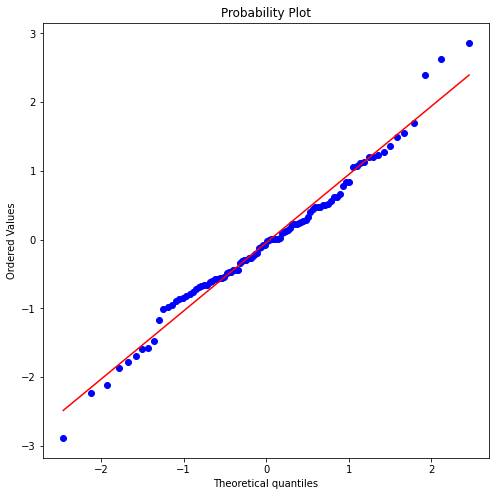

In [2]:
import matplotlib.pyplot as plt
import scipy.stats as stats

fig, ax = plt.subplots(figsize=(8, 8))
norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax);

Algumas propriedades importantes da distribuição normal:

- Ela é simétrica. A distribuição normal não serve para modelar dados assimétricos (skewed); e
- A média, mediana e moda são iguais.

## Distribuição Binomial

Quaisquer dados que consistam em possíveis saídas do tipo sim/não, fazer/não-fazer, cara/coroa etc se encaixam na distribuição binomial.

O centro dessa distribuição é a ideia de um conjunto de tentativas, sendo que cada tentativa possui exatamente dois possíveis resultados (cada um com probabilidades definidas).

Por exemplo, jogar uma moeda 10 vezes é um experimento binomial com 10 tentativas, cada uma tendo duas possíveis saídas (cara ou coroa) e cada uma com 50% de chance de ocorrer.

A distribuição binomial é a distribuição de frequência do número de sucessos (x) em uma dada quantidade de tentativas (n) com uma probabilidade especificada (p) de sucesso em cada tentativa. Essa distribuição responde a perguntas do tipo: "se a probabilidade de um click ser convertido em uma venda é de 0.02, qual a probabilidade de se observar 0 vendas em 200 clicks?"

A célula abaixo retorna 0.0729, que é a probabilidade de se observar exatamente x = 2 sucessos em n = 5 tentativas, onde a probabilidade de sucesso para cada tentativa é de p = 0.1. Agora você também consegue calcular a probabilidade pedida no exemplo do parágrafo acima? Resposta: ~ 0.0176.

In [3]:
stats.binom.pmf(2, n=5, p=0.1)

0.0729

Também é comum que estejamos interessados em determinar a probabilidade de x ou menos sucessos em n tentativas. Nesse caso, utilizamos a função abaixo.

In [4]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144

A média em uma distribuição binomial é dada por $n \times p$.

A variância é dada por $n \times p \times (1 - p)$. Para uma quantidade grande o suficiente de tentativas (particularmente quando p é próximo de 0.5), a distribuição binomial é virtualmente indistinguivel da distribuição normal. De fato, calcular probabilidades binomiais com amostras grandes é computacionalmente pesado e a maior parte dos procedimentos estatísticos utilizam a distribuição normal, com média e variância, como uma aproximação.

## Distribuição de Poisson

A distribuição de Poisson nos diz a distribuição de eventos por unidade de tempo ou espaço quando amostramos muitas dessas unidades. É útil ao abordar problemas relacionados a filas como "qual capacidade precisamos para estarmos 95% certos de que iremos processar o tráfego de Internet que chega em um servidor em qualquer período de 5 segundos?"

O parâmetro-chave em uma distribuição de Poisson é o $\lambda$ (lambda). Este é o número médio de eventos que ocorrem em um intervalo de tempo ou espaço especificado. A variância de uma Poisson também é $\lambda$.

Vamos gerar 100 números que seguem uma Poisson com $\lambda = 2$.

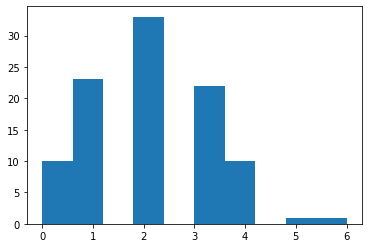

[1 3 4 3 5 4 2 2 1 2 2 3 2 3 4 6 3 1 4 2 4 0 3 1 2 2 1 0 2 3 3 2 1 1 3 2 4
 1 2 3 2 0 1 4 3 1 2 2 2 2 2 2 2 1 2 3 1 0 2 2 2 3 2 0 1 2 3 0 3 2 1 1 2 4
 3 0 3 1 3 4 3 1 2 2 0 2 4 2 1 1 0 0 2 3 1 1 1 3 3 1]


In [5]:
poisson_data = stats.poisson.rvs(2, size=100)

plt.hist(poisson_data)
plt.show()

print(poisson_data)

O exemplo acima representa: são recebidas, em média, 2 chamadas em um centro de atendimento ao cliente por minuto. Aqui, foram simulados 100 minutos, retornando a quantidade de chamadas recebidas em cada um desses minutos.

### Distribuição Exponencial

Usando o mesmo parâmetro $\lambda$ que usamos na distribuição de Poisson, também podemos modelar a distribuição do tempo entre eventos: tempo entre as visitas a um site ou entre os carros que chegam a um pedágio. A distribuição exponencial também é usada na engenharia para modelar o tempo para falha, e na gestão de processos para modelar, por exemplo, o tempo necessário por chamada de serviço.

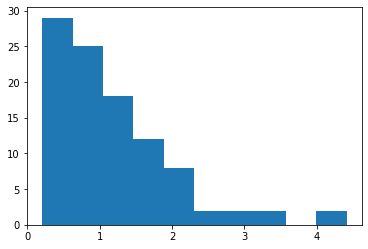

[0.44781731 4.40934173 0.40917476 3.3166967  0.86607441 0.76404702
 1.02229576 3.21422819 2.26166824 0.48549016 0.32143455 2.06564215
 1.95002223 0.5754295  0.75870797 0.67896535 0.55197827 0.43535467
 0.41810946 1.51490845 1.29516959 0.22899584 1.37535604 0.98408326
 1.28525768 0.63136629 0.6389935  1.10185686 0.71394183 1.17887906
 0.7131238  0.34176384 0.46243536 0.5290372  1.82127412 1.5608506
 0.90092192 0.75747342 0.2067607  1.14386141 1.74416304 1.86024476
 0.83627477 0.3770375  1.59900716 0.3205465  1.17848191 1.41555075
 1.25100597 0.45925676 1.75823709 1.13489434 0.88341787 1.14138736
 1.00739193 0.62063816 0.56482602 2.01523801 2.50295256 0.56321201
 0.87324742 0.98224295 2.76828429 0.3887071  1.19256695 1.12461739
 0.63661479 0.74721447 0.37469953 0.7333143  2.39342132 2.10754529
 3.04687042 0.71506206 1.81625663 1.35454806 0.78274457 0.86887204
 1.2690674  1.53623095 1.74164934 0.46807757 1.6358008  0.85831028
 1.06909418 0.26422439 0.22103836 1.03596532 0.57259981 1.21351

In [6]:
exp_data = stats.expon.rvs(0.2, size=100)

plt.hist(exp_data)
plt.show()

print(exp_data)

Este código gerou 100 números aleatórios de uma distribuição exponencial onde a quantidade média de eventos por período de tempo é de 0.2. Mantendo o mesmo exemplo, simulamos 100 minutos, onde a média de chamadas por minuto é de 0.2. Os valores apresentados são os tempos transcorridos entre cada ligação.

Um requisito importante em qualquer simulação tanto de Poisson quanto exponencial é que a taxa $\lambda$ precisa ser constante durante todo o experimento, o que raramente acontece na realidade (tráfego nas pistas, volume de dados em uma rede etc). Entretanto, os períodos de tempo geralmente podem ser divididos em segmentos, que são suficientemente homogêneos e, assim, a simulação se torna válida.

### Distribuição Weibull

Se a taxa de eventos varia dentro do período de análise, não podemos mais utilizar as distribuições acima. Nesse caso, utilizamos a distribuição Weibull.

Essa distribuição é uma extenção da exponencial, porém especificada por um parâmetro $\beta$. Se $\beta > 1$, a probabilidade do evento aumenta conforme o tempo passa; se $\beta < 1$, a probabilidade diminui. Também há um segundo parâmetro, $\eta$, chamado de parâmetro de escala. Quanto maior esse parâmetro é, mais alongada para a direita a distribuição fica e sua altura diminui. Quando esse valor diminui, o efeito é o oposto.

O exemplo abaixo gera 100 números aleatórios com shape ($\beta$) de 1.5 e escala ($\eta$) de 5000.

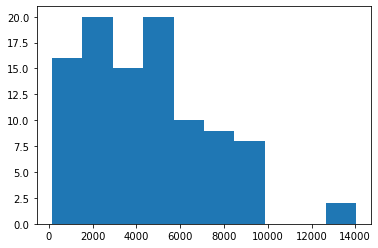

[ 1957.19490577  2491.43787458   626.55632044  4581.65424915
  6327.24514904  2634.54452148  4883.20041873 13376.25678766
  7574.02987766   738.51567656  5743.92627945  6627.94018617
  5226.23620536  5924.71039637   245.00480175  4681.96224408
  8669.55619122  1317.17750375  3888.42429833  4162.53991217
  3856.44840679  6175.3283876    234.0180804   2654.89735327
  4767.17337694  2128.27460357  4515.23005482  4307.16958445
  4150.89162808  5239.60290729  2731.08500464  3859.36481792
  7351.95065693  5583.93008688   848.51249894  4853.58588114
  5211.49637388  1788.98816857  5657.23076576  1722.6633164
  1051.67792144   841.13646645  1606.24393318  2053.00223105
  2609.88860823  3287.14986892  2651.04505991  1719.26223854
  9495.23846726  4962.41947172  9102.77836646  5535.12346485
  7629.49090296  4894.91945953  3263.39466649   505.52324913
 14039.12094425  7527.47066825  9422.54600247  9164.8682813
  2874.49329184  8351.36825211  3539.03365423  4338.27329617
  3821.44522731  8795.5714

In [7]:
weibull_data = stats.weibull_min.rvs(1.5, scale=5000, size=100)

plt.hist(weibull_data)
plt.show()

print(weibull_data)

## Exercícios

Utilizando os arquivos de dataset fornecidos com este notebook, realize as seguintes atividades:

1. Utilize o método de bootstrap no dataset_1 para descobrir o desvio padrão dessa distribuição. Utilize o tamanho da amostra em 1000 e encontre a quantidade de repetições mínima necessária para que o desvio padrão calculado não divirja em mais do que 0.1% do valor real.

2. Utilize os 3 datasets e defina qual se refere a qual distribuição (normal, exponencial ou Poisson). Ainda, especifique seus parâmetros (normal - média e desvio padrão -, exponencial - lambda - e Poisson - lambda). Utilize QQ-Plot.